# Census Income

### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.                                                
2.Controls for Hispanic Origin by age and sex.                                                                          
3.Controls by Race, age and sex.                                                                                                

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/census_income.csv")
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
21088,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
8640,23,State-gov,33551,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,38,United-States,<=50K
9179,54,Private,329266,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,44,United-States,>50K
4198,18,Private,127388,12th,8,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<=50K
24529,60,Private,143932,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
9720,49,State-gov,155372,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
13738,21,Private,121889,Some-college,10,Never-married,Sales,Own-child,Black,Female,0,0,20,United-States,<=50K
19986,45,State-gov,187581,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
11193,17,Private,244589,11th,7,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
7758,41,Private,49654,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,52,United-States,<=50K


## Exploratory Data Analysis (EDA)

In [5]:
df.shape

(32560, 15)

###### There is 32560 rows and 15 columns

In [6]:
print("Basic Information about the dataset:")
print(df.info())

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


there is having 6 integer datatypes and 9 object datatypes.

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

#### These are the columns name--

'Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'

In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

##### There is 6 Intigers columns and 9 object columns

### Checking null values 

In [9]:
print("Total Missing values in dataset:- ", df.isnull().sum().sum())
print('\n')
print(df.isnull().sum())

Total Missing values in dataset:-  0


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


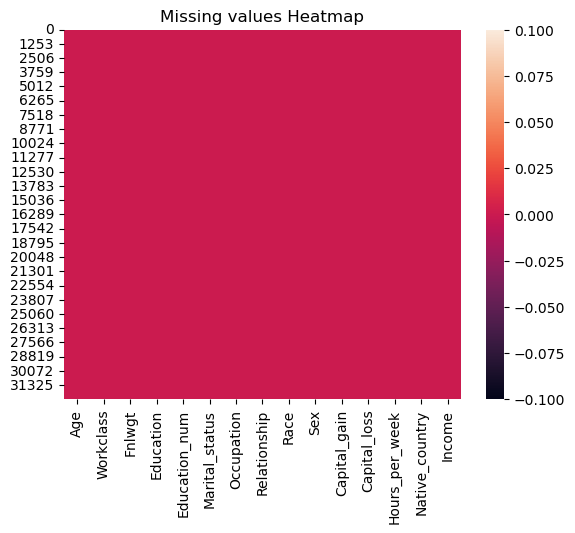

In [10]:
#visualize missing values usning heatmap
sns.heatmap(df.isnull())
plt.title("Missing values Heatmap")
plt.show()

#### There is no any missing values columns in our dataset

In [11]:
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())


Summary Statistics for Numeric Columns:
                Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [12]:
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include='object'))


Summary Statistics for Categorical Columns:
       Workclass Education       Marital_status       Occupation Relationship  \
count      32560     32560                32560            32560        32560   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          Race    Sex  Native_country  Income  
count    32560  32560           32560   32560  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27815  21789           29169   24719  



Data Distribution Visualization:


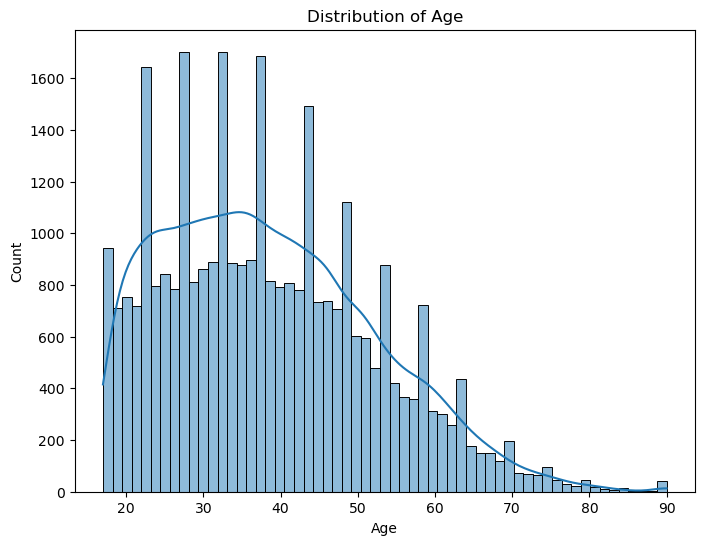

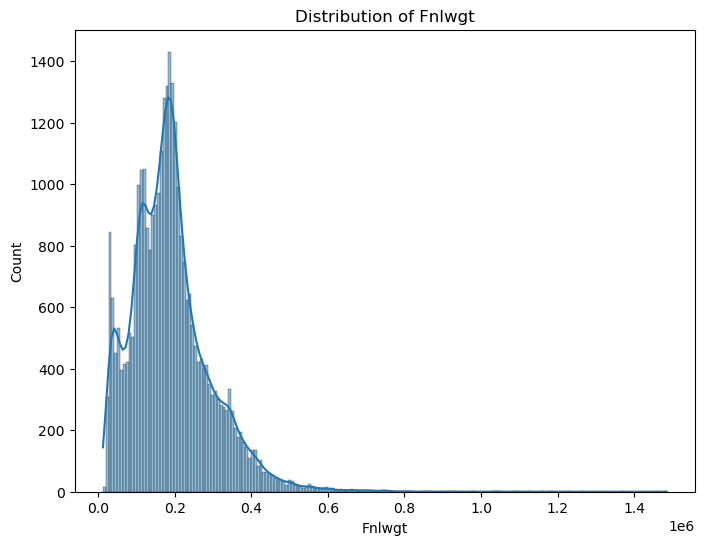

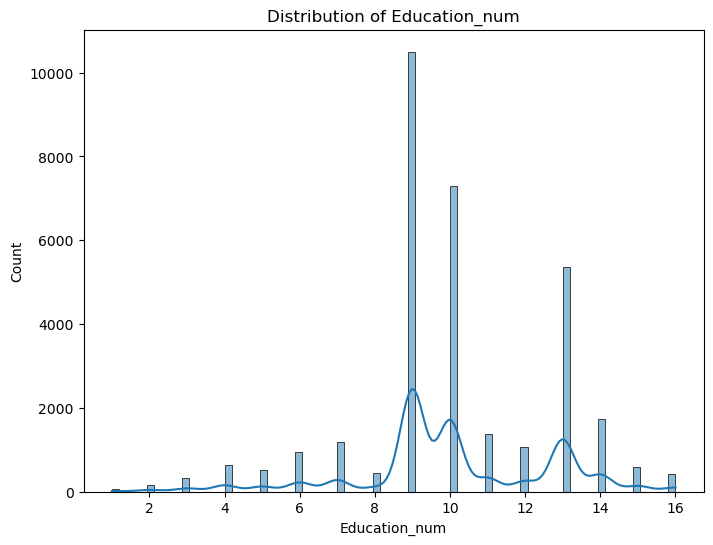

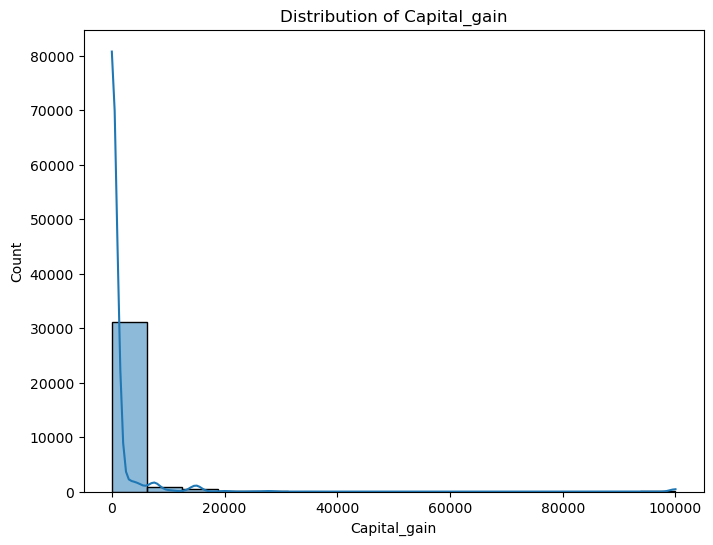

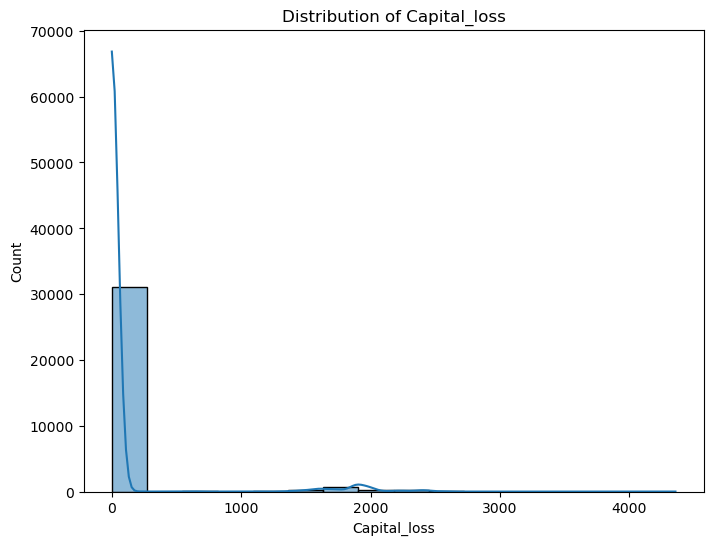

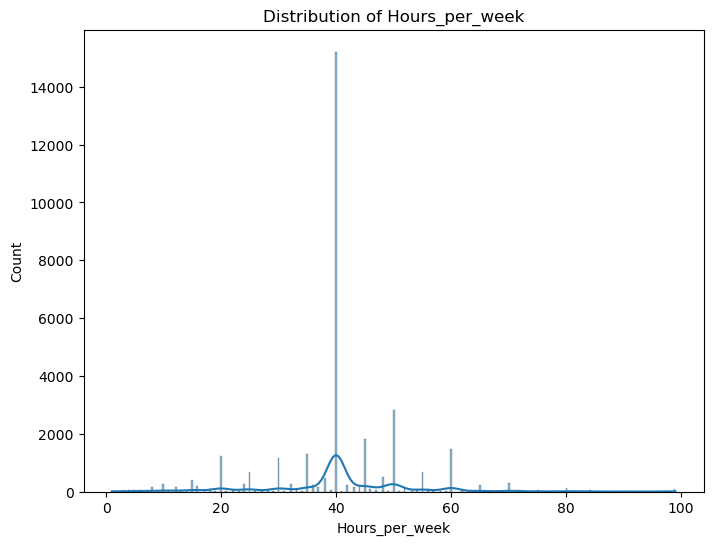

In [13]:
print("\nData Distribution Visualization:")
numeric_cols = df.select_dtypes(include='number')
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [14]:
# Checking unique values of very columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'Age':
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Unique values in column 'Workclass':
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Unique values in column 'Fnlwgt':
[ 83311 215646 234721 ...  34066  84661 257302]


Unique values in column 'Education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Unique values in column 'Education_num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Unique values in column 'Marital_status':
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


Unique

##### As per above observations we can see that thire is '?' present in columns  Occupation,  Workclass,  Native_country some we replace it with 0

In [15]:
# Replace ' ?' with '0' 
df['Workclass'].replace(' ?', '0', inplace=True)
df['Occupation'].replace(' ?', '0', inplace=True)
df['Native_country'].replace(' ?', '0', inplace=True)

In [16]:
# Checking again unique values of very columns agter replace with 0
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'Age':
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Unique values in column 'Workclass':
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 '0' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Unique values in column 'Fnlwgt':
[ 83311 215646 234721 ...  34066  84661 257302]


Unique values in column 'Education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Unique values in column 'Education_num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Unique values in column 'Marital_status':
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


Unique 

In [17]:
df.nunique()


Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [18]:
# checking duplicates and removing it
print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


#### Our target column is Income we have to predict whether a person make over $50 or not

In [19]:
df['Income'].value_counts()

Income
 <=50K    24697
 >50K      7839
Name: count, dtype: int64

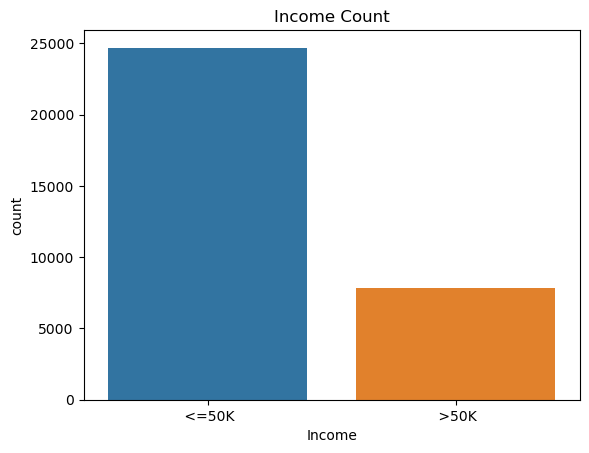

In [20]:
sns.countplot(data=df, x='Income')
plt.title('Income Count')
plt.show()


#### There are only 2 unique values in our target variable "Income" i.e <=50k and >50k
#### We can understand that 24697 rows has income as <=50k and 7839 rows has income as >50k.

In [21]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


As per above observations we can see that count of each column is 32536.

There is huge difference in mean values and 50% for column 'Capital_gain' and 'Capital_loss'

Similar in case of 75% and maximum values for column "Capital_gain" and 'Capital_loss'

min,25%,50%,75% values are 0 for columns 'Capital_gain' and 'Capital_loss'

### Checking Skewness

In [22]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])

skewness_list = []

for column in numeric_features.columns:
    skewness = numeric_features[column].skew()
    skewness_list.append(skewness)

skewness_df = pd.DataFrame({'Feature': numeric_features.columns, 'Skewness': skewness_list})
skewness_df = skewness_df.sort_values(by='Skewness', ascending=False)

print(skewness_df)

          Feature   Skewness
3    Capital_gain  11.949245
4    Capital_loss   4.592622
1          Fnlwgt   1.447695
0             Age   0.557657
5  Hours_per_week   0.228752
2   Education_num  -0.309454


## Outliers

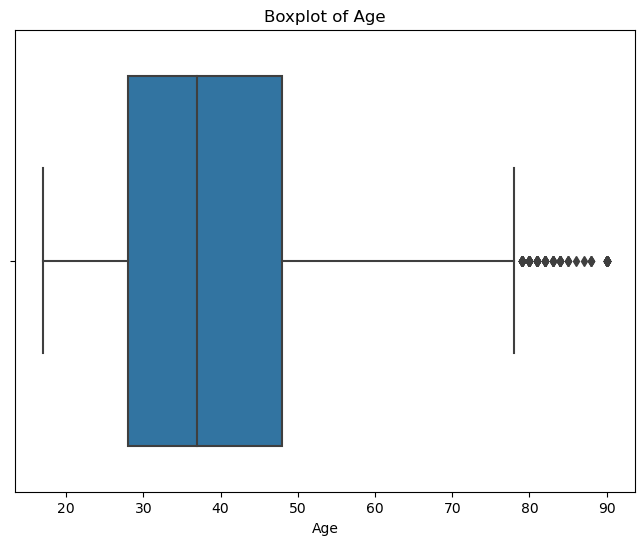

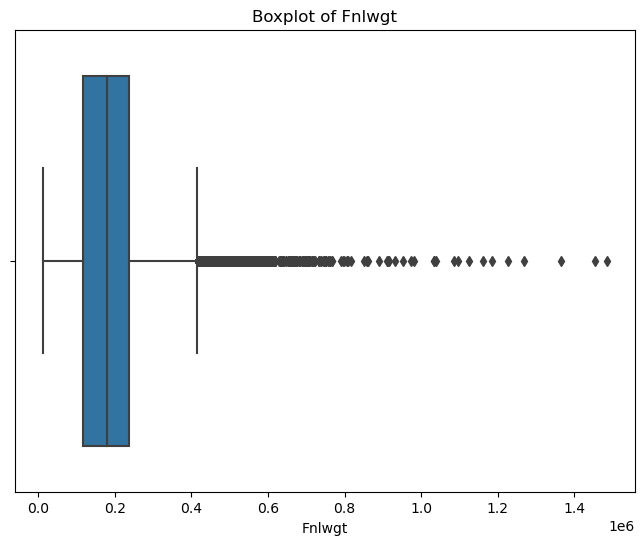

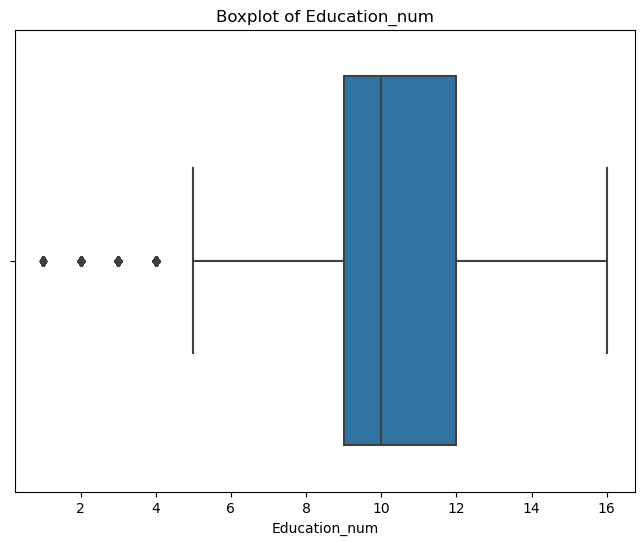

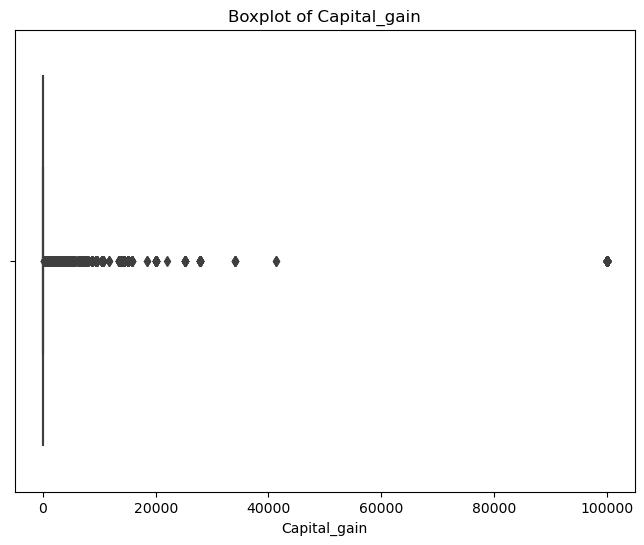

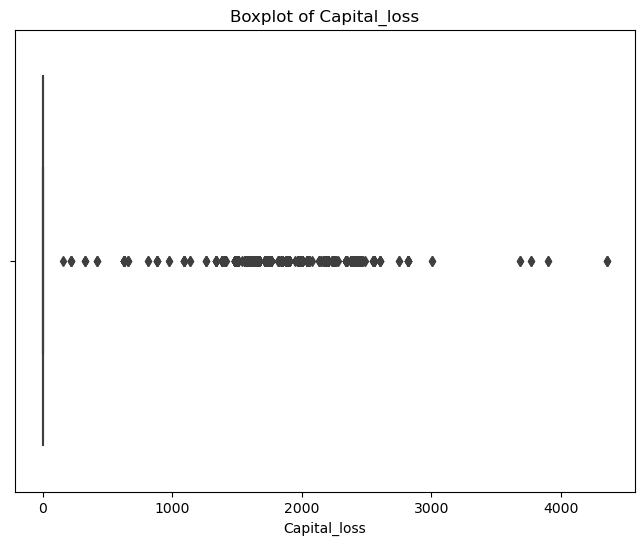

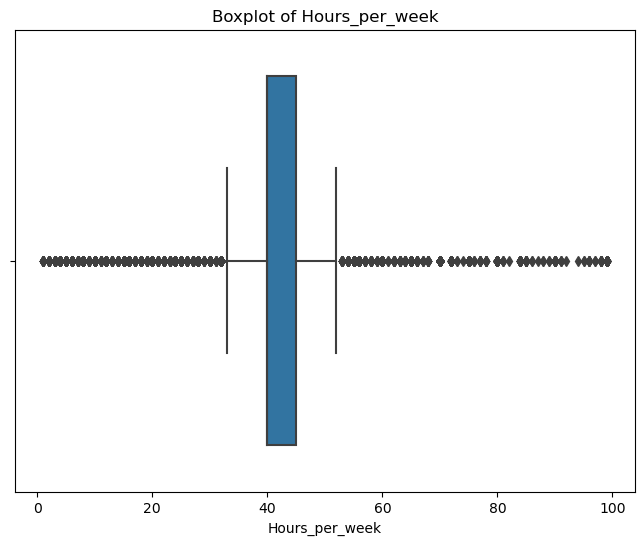

In [23]:
for column in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

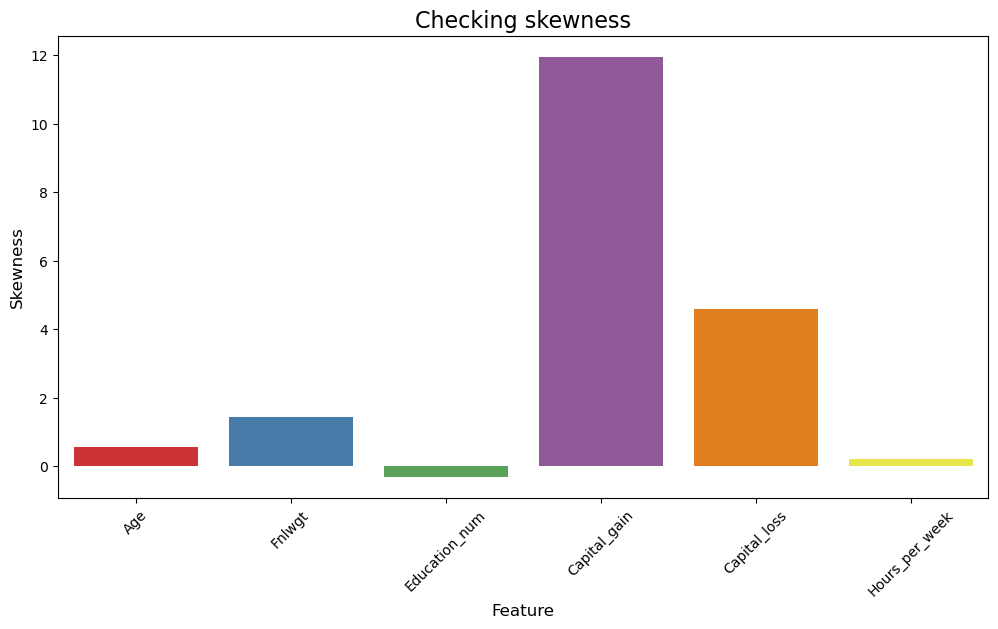

In [24]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skew_values = df[numeric_columns].skew()

plt.figure(figsize=(12, 6))
sns.barplot(x=skew_values.index, y=skew_values.values, palette="Set1")
plt.title("Checking skewness", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Skewness", fontsize=12)
plt.show()


We can observe that there are many outliers present in our numerical column, So we treat them

In [25]:
from scipy.stats import zscore

# Features containing outliers
features = df[["Age","Fnlwgt","Education_num","Capital_gain","Capital_loss","Hours_per_week"]]

z = np.abs(zscore(features))

# Creating a new dataframe
df1 = df[(z < 3).all(axis=1)]


In [26]:
data_loss = (len(df) - len(df1)) / len(df) * 100
print(f"Data loss after treating outliers: {data_loss:.2f}%")

Data loss after treating outliers: 8.38%


## Encoding

In [27]:
# Lets use LabelEncoder in our target veriable 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["Income"] = le.fit_transform(df1["Income"])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


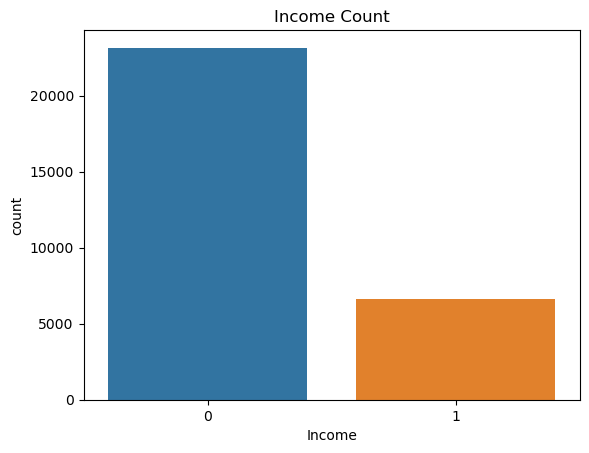

In [28]:
sns.countplot(data=df1, x='Income')
plt.title('Income Count')
plt.show()


In [29]:
# Lets use OrdinalEncoder to Encode the feature columns
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
columns_to_encode = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Native_country', 'Race', 'Sex']
df1[columns_to_encode] = oe.fit_transform(df1[columns_to_encode])
df1.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,8.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0,0
1,38,3.0,215646,10.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0,0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0,0
3,28,3.0,338409,8.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0
4,37,3.0,284582,11.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,37.0,0


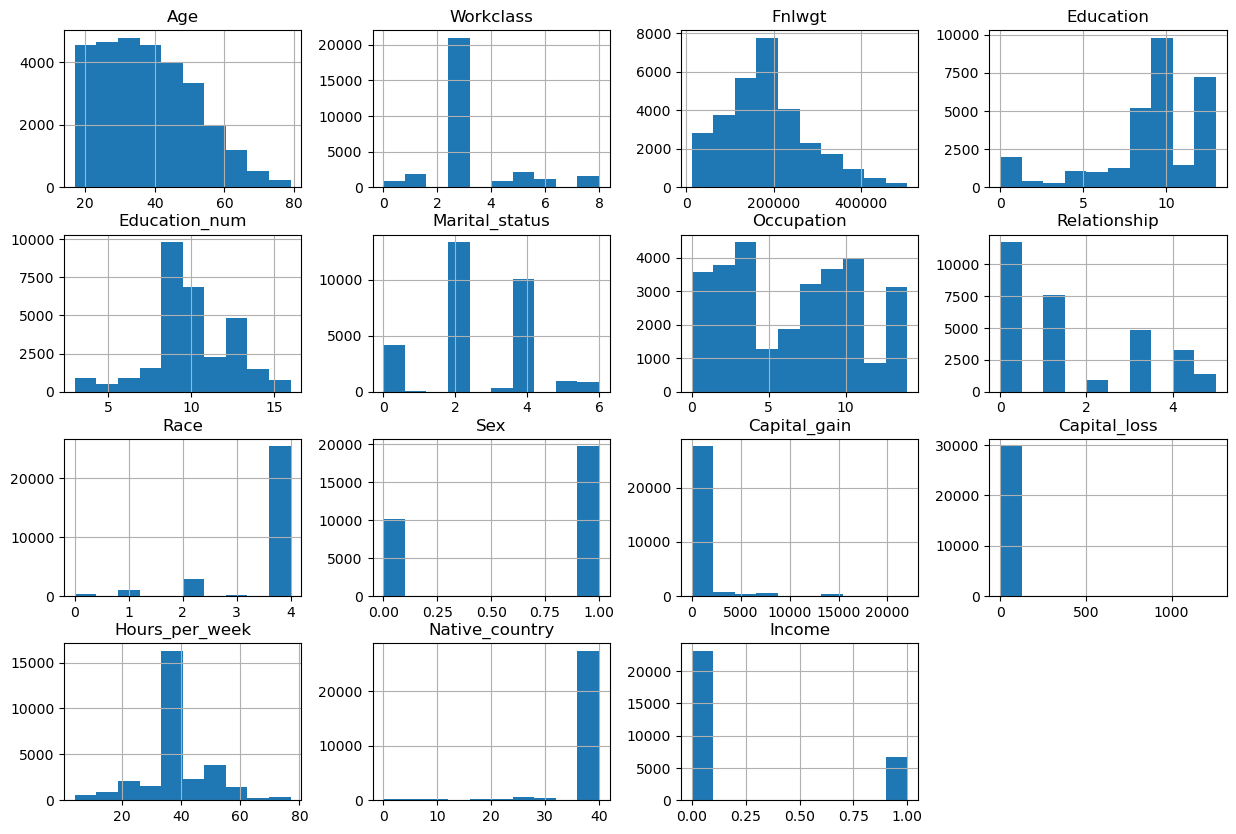

In [30]:
df1.hist(figsize=(15,10))
plt.show()

In [31]:
df1.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.042213,-0.074430,-0.004661,0.041431,-0.285335,0.004201,-0.266802,0.027937,0.086589,0.131014,0.020820,0.091817,-0.001762,0.239314
Workclass,0.042213,1.000000,-0.018006,-0.021154,-0.057183,0.042855,0.310480,0.012221,0.019015,0.001884,-0.010717,-0.008167,-0.102833,-0.000135,-0.059782
Fnlwgt,-0.074430,-0.018006,1.000000,-0.023083,-0.037725,0.029000,-0.002591,0.008349,-0.010514,0.028520,-0.002374,0.002579,-0.015489,-0.059984,-0.009160
Education,-0.004661,-0.021154,-0.023083,1.000000,0.361097,-0.037416,-0.047922,-0.012924,0.015588,-0.027878,0.027164,-0.000924,0.060787,0.070648,0.074621
Education_num,0.041431,-0.057183,-0.037725,0.361097,1.000000,-0.059092,0.043112,-0.096694,0.028587,0.009276,0.154841,0.009481,0.150713,0.059907,0.318731
Marital_status,-0.285335,0.042855,0.029000,-0.037416,-0.059092,1.000000,0.052242,0.184713,-0.066169,-0.123350,-0.068272,-0.013817,-0.195162,-0.015824,-0.194355
Occupation,0.004201,0.310480,-0.002591,-0.047922,0.043112,0.052242,1.000000,-0.014237,-0.007737,0.029077,0.001752,-0.002100,-0.065468,-0.000391,0.008033
Relationship,-0.266802,0.012221,0.008349,-0.012924,-0.096694,0.184713,-0.014237,1.000000,-0.116226,-0.577197,-0.090370,0.028830,-0.257798,-0.011495,-0.245913
Race,0.027937,0.019015,-0.010514,0.015588,0.028587,-0.066169,-0.007737,-0.116226,1.000000,0.089914,0.023537,0.001324,0.045400,0.112151,0.071755
Sex,0.086589,0.001884,0.028520,-0.027878,0.009276,-0.123350,0.029077,-0.577197,0.089914,1.000000,0.070813,-0.026354,0.233755,0.003300,0.209946


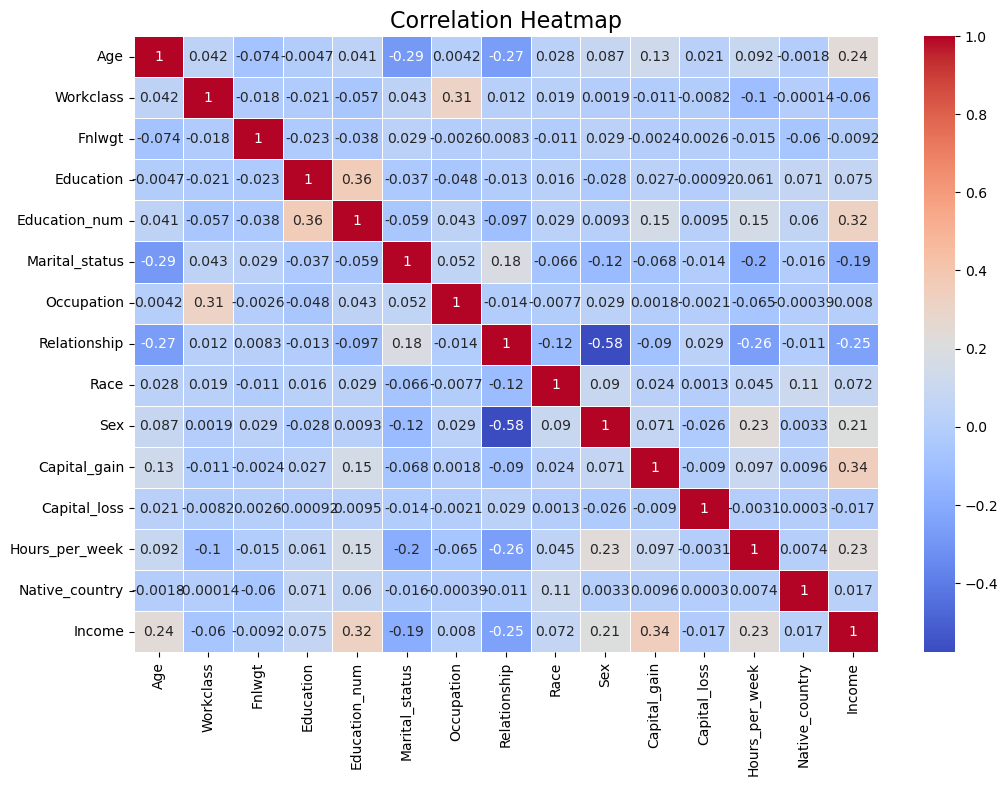

In [32]:
corr_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Sex column is highly negatively related with column relationship.

Also this heatmap shows us that there is no multicolinearity issue bewteen our columns.

#### Comparison between target variable and other feature columns using Correlation Barplot

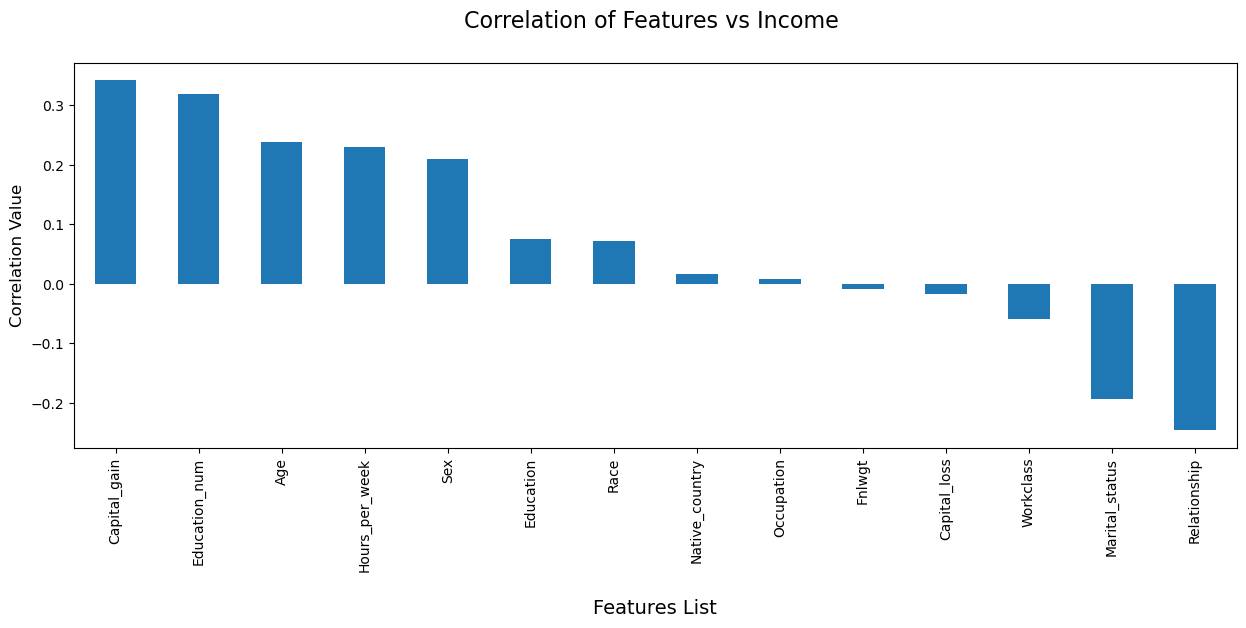

In [33]:
df1_c = df1.corr()
plt.figure(figsize=(15,5))
df1_c['Income'].sort_values(ascending=False).drop('Income').plot.bar()
plt.title("Correlation of Features vs Income \n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

We can observe that workclass & Fnlwgt are very less correlated with our target variable.

Marital status & Relationship columns are only the columns which are negatively correlated with target variable, remaining all columns are positively correlated with our target variable.

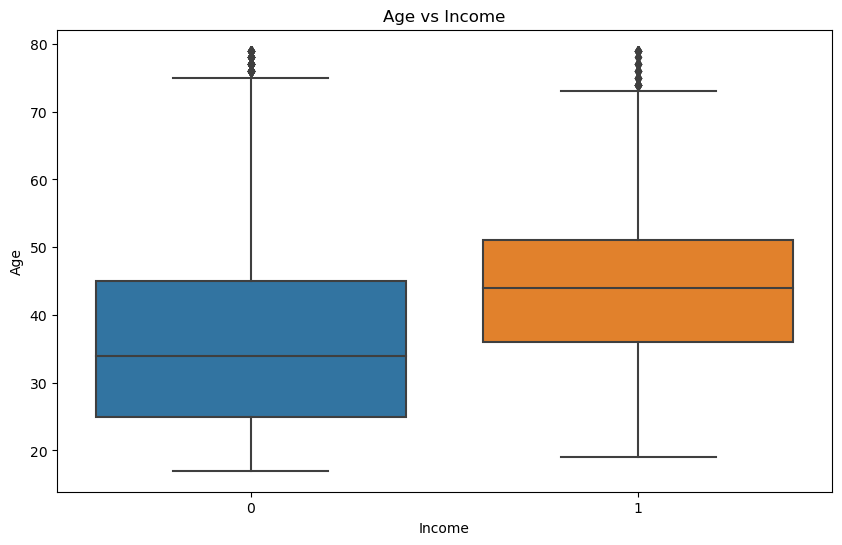

In [34]:
# Age vs Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Age', data=df1)
plt.title('Age vs Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


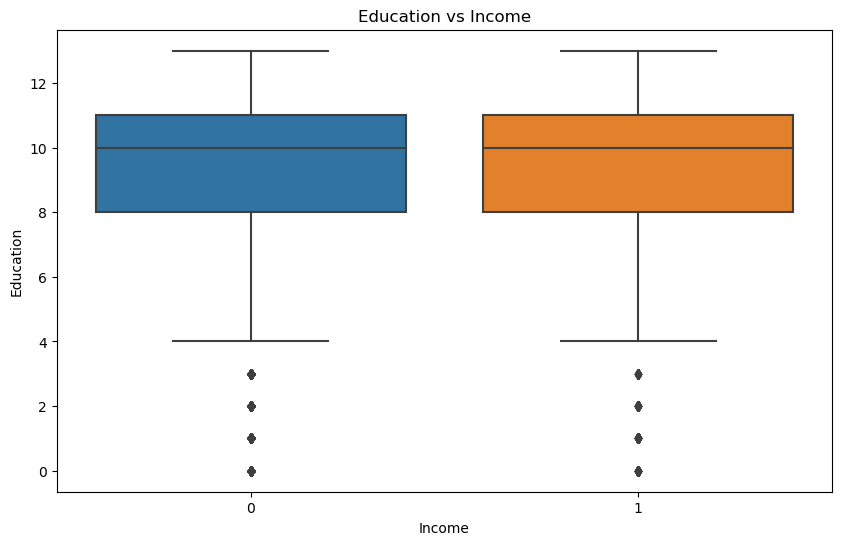

In [35]:
# Education vs Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Education', data=df1)
plt.title('Education vs Income')
plt.xlabel('Income')
plt.ylabel('Education')
plt.show()


### Seprating features and label

In [36]:
x = df1.drop('Income', axis=1)
y = df1['Income']

In [37]:
y.value_counts()

Income
0    23156
1     6652
Name: count, dtype: int64

In [69]:
23156/6652

3.481058328322309

There is oversampling issue in our data, so let us use SMOTE and resolve the oversampling to make our data balanced

In [38]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)


In [39]:
y.value_counts()

Income
0    23156
1    23156
Name: count, dtype: int64

### Feature Scaling

In [40]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.813667,1.168148,-1.082057,-0.445287,1.085083,-0.324064,-0.851064,-0.781908,0.380674,0.635325,-0.336807,-0.0305,-2.773029,0.251759
1,-0.173836,-0.208774,0.331165,0.226652,-0.627239,-1.851076,-0.353490,-0.137315,0.380674,0.635325,-0.336807,-0.0305,-0.140620,0.251759
2,1.060543,-0.208774,0.534869,-2.797071,-1.483399,-0.324064,-0.353490,-0.781908,-2.202438,0.635325,-0.336807,-0.0305,-0.140620,0.251759
3,-0.996756,-0.208774,1.642166,-0.445287,1.085083,-0.324064,0.641657,2.441059,-2.202438,-1.696939,-0.336807,-0.0305,-0.140620,-5.822896
4,-0.256128,-0.208774,1.067341,0.562621,1.513163,-0.324064,-0.851064,2.441059,0.380674,-1.696939,-0.336807,-0.0305,-0.140620,0.251759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46307,0.319915,0.596911,0.860262,0.619827,0.657002,-0.324064,-0.080833,-0.781908,0.380674,0.635325,-0.336807,-0.0305,0.249367,-3.302736
46308,-0.338420,0.554568,0.010577,-0.372202,0.657002,1.036860,-0.851064,-0.207425,0.380674,-1.443266,-0.336807,-0.0305,1.614320,0.251759
46309,1.060543,0.577663,-0.838531,0.658887,-0.627239,-0.324064,0.285706,-0.781908,0.380674,0.635325,-0.336807,-0.0305,1.516823,0.251759
46310,-0.585296,1.136789,-1.602569,-0.781256,0.228922,-0.324064,-0.856730,-0.781908,0.380674,0.635325,-0.336807,-0.0305,1.711816,0.251759


## Checking VIF (Variance Inflation Factor) values

In [41]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
                     for i in range (len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.180889,Age
1,1.100896,Workclass
2,1.010777,Fnlwgt
3,1.105078,Education
4,1.176101,Education_num
5,1.140683,Marital_status
6,1.099533,Occupation
7,1.905608,Relationship
8,1.034631,Race
9,1.772125,Sex


We can observe that none of the feature column has value greater than 10, so we can now proceed without any issue

## Finding best random state for building Classification Models

In [42]:
maccy = 0
rands = 0
besttsz = 0

test_sizes = [0.20, 0.25, 0.30, 0.35]

for test_size in test_sizes:
    for random_state in range(1, 1000):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
        lr = LogisticRegression()
        lr.fit(x_train, y_train)
        pred = lr.predict(x_test)
        accuracy = accuracy_score(y_test, pred)

        if accuracy > maccy:
            maccy = accuracy
            rands = random_state
            besttsz = test_size

print("Best accuracy score is", maccy, "on Random State", rands, "with Test Size", besttsz)


Best accuracy score is 0.7786894094785707 on Random State 395 with Test Size 0.2


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=415)

In [44]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (37049, 14)
y_train shape: (37049,)
x_test shape: (9263, 14)
y_test.shape: (9263,)


## LogisticRegression

In [45]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

LR = LogisticRegression()

grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_LR = LogisticRegression(**best_params)

best_LR.fit(x_train, y_train)

predLR = best_LR.predict(x_test)

accuracy = accuracy_score(y_test, predLR)
conf_matrix = confusion_matrix(y_test, predLR)
class_report = classification_report(y_test, predLR)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7709165497139155

Confusion Matrix:
 [[3456 1147]
 [ 975 3685]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      4603
           1       0.76      0.79      0.78      4660

    accuracy                           0.77      9263
   macro avg       0.77      0.77      0.77      9263
weighted avg       0.77      0.77      0.77      9263



Accuracy: 0.7691892475439922

Confusion Matrix:
 [[3495 1108]
 [1030 3630]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      4603
           1       0.77      0.78      0.77      4660

    accuracy                           0.77      9263
   macro avg       0.77      0.77      0.77      9263
weighted avg       0.77      0.77      0.77      9263



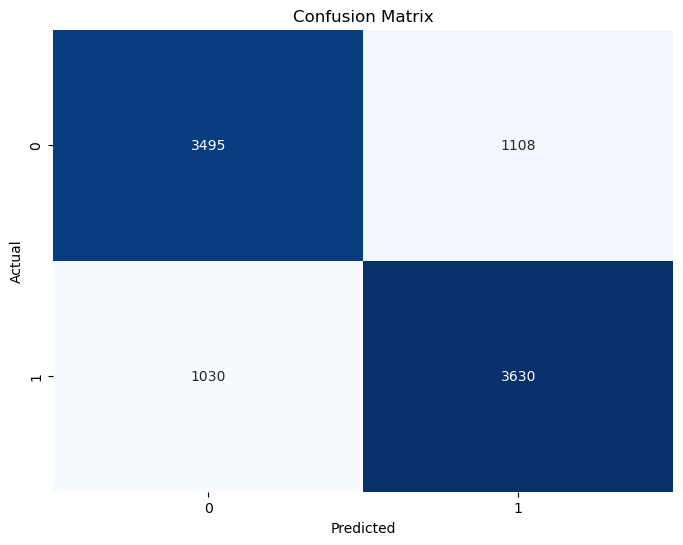

In [46]:
LR = LogisticRegression(C=1, penalty="l1", solver="liblinear")
LR.fit(x_train, y_train)

pred_LR = LR.predict(x_test)

acy = accuracy_score(y_test, pred_LR)
cfmt = confusion_matrix(y_test, pred_LR)
clfr = classification_report(y_test, pred_LR)

print("Accuracy:", acy)
print("\nConfusion Matrix:\n", cfmt)
print("\nClassification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Checking accuracy for RandomForestClassifier

In [47]:
param_combinations=[{'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'gini'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'gini'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'gini'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'entropy'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'entropy'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'entropy'},]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'}
Test Accuracy: 0.9066177264385188


Accuracy: 0.9068336392097592
Confusion Matrix:
 [[4230  373]
 [ 490 4170]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      4603
           1       0.92      0.89      0.91      4660

    accuracy                           0.91      9263
   macro avg       0.91      0.91      0.91      9263
weighted avg       0.91      0.91      0.91      9263



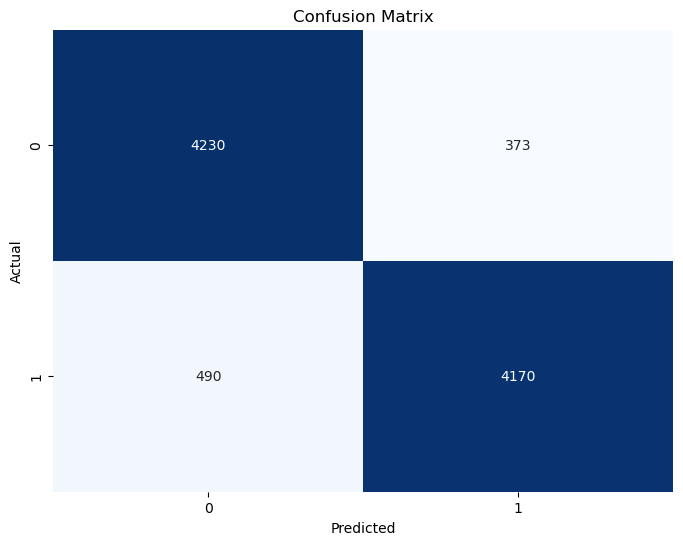

In [50]:
RFC = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=20)
RFC.fit(x_train, y_train)

pred_RFC = RFC.predict(x_test)

acy = accuracy_score(y_test, pred_RFC)
cfmt = confusion_matrix(y_test, pred_RFC)
clfr = classification_report(y_test, pred_RFC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Support vector classifier

Accuracy: 0.8694807297851668
Confusion Matrix:
 [[3812  791]
 [ 418 4242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      4603
           1       0.84      0.91      0.88      4660

    accuracy                           0.87      9263
   macro avg       0.87      0.87      0.87      9263
weighted avg       0.87      0.87      0.87      9263



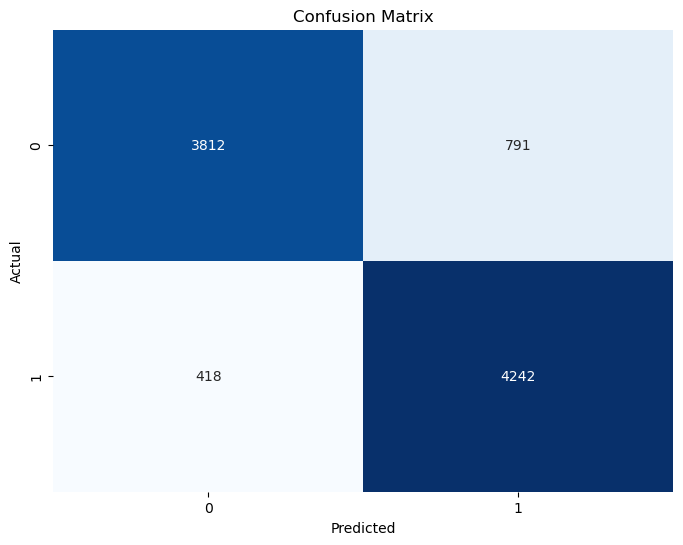

In [51]:
svc_rbf = SVC(kernel='rbf', gamma='auto', C=42)
svc_rbf.fit(x_train, y_train)

pred_svc_rbf = svc_rbf.predict(x_test)

acy = accuracy_score(y_test, pred_svc_rbf)
cfmt = confusion_matrix(y_test, pred_svc_rbf)
clfr = classification_report(y_test, pred_svc_rbf)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## DecisionTreeClassifier

In [52]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2}
Test Accuracy: 0.8863219259419195


Accuracy: 0.8857821440138184
Confusion Matrix:
 [[4142  461]
 [ 597 4063]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4603
           1       0.90      0.87      0.88      4660

    accuracy                           0.89      9263
   macro avg       0.89      0.89      0.89      9263
weighted avg       0.89      0.89      0.89      9263



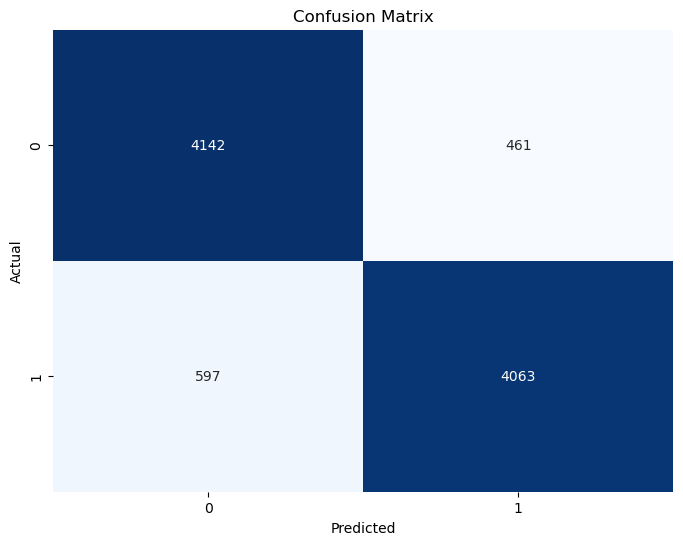

In [53]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=2, min_samples_leaf=2)
dtc.fit(x_train, y_train)

pred_dtc = dtc.predict(x_test)

acy = accuracy_score(y_test, pred_dtc)
cfmt = confusion_matrix(y_test, pred_dtc)
clfr = classification_report(y_test, pred_dtc)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## ExtraTreesClassifier

In [54]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(x_train, y_train)
    y_pred = et_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.9000323869156861


Accuracy: 0.8501565367591493
Confusion Matrix:
 [[3581 1022]
 [ 366 4294]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      4603
           1       0.81      0.92      0.86      4660

    accuracy                           0.85      9263
   macro avg       0.86      0.85      0.85      9263
weighted avg       0.86      0.85      0.85      9263



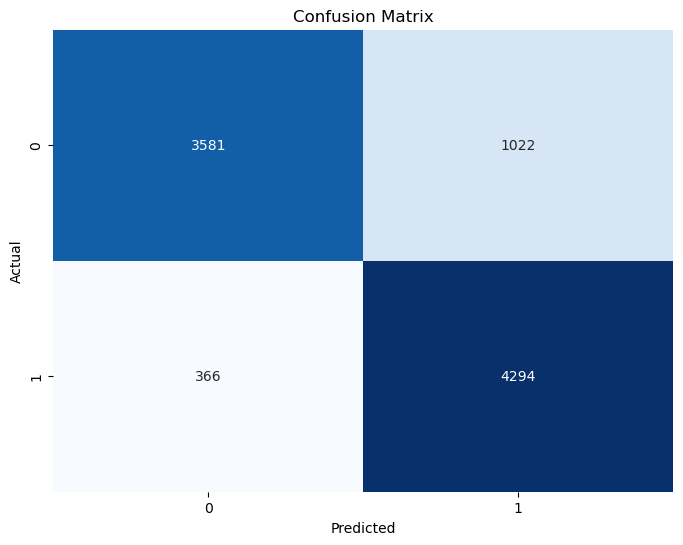

In [55]:
EXC = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1)
EXC.fit(x_train, y_train)

pred_EXC = EXC.predict(x_test)

acy = accuracy_score(y_test, pred_EXC)
cfmt = confusion_matrix(y_test, pred_EXC)
clfr = classification_report(y_test, pred_EXC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## GradientBoostingClassifier

In [56]:
param_combinations = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 250, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    gb_classifier = GradientBoostingClassifier(**params, random_state=42)
    gb_classifier.fit(x_train, y_train)
    y_pred = gb_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 250, 'learning_rate': 0.1, 'max_depth': 3}
Test Accuracy: 0.9114757637914283


Accuracy: 0.9114757637914283
Confusion Matrix:
 [[4298  305]
 [ 515 4145]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4603
           1       0.93      0.89      0.91      4660

    accuracy                           0.91      9263
   macro avg       0.91      0.91      0.91      9263
weighted avg       0.91      0.91      0.91      9263



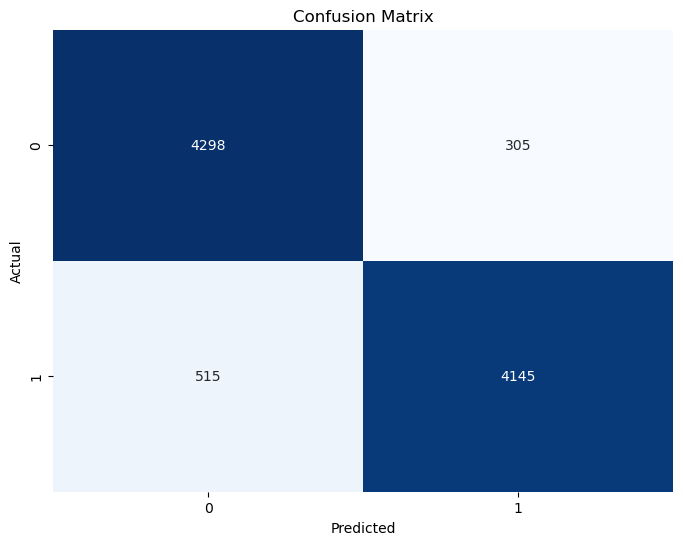

In [57]:
GBC = GradientBoostingClassifier(n_estimators=250, learning_rate=0.1, max_depth=3)
GBC.fit(x_train, y_train)

pred_GBC = GBC.predict(x_test)

acy = accuracy_score(y_test, pred_GBC)
cfmt = confusion_matrix(y_test, pred_GBC)
clfr = classification_report(y_test, pred_GBC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## AdaBoostClassifier

In [58]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 150, 'learning_rate': 0.1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    ada_classifier=AdaBoostClassifier(**params, random_state=42)
    ada_classifier.fit(x_train, y_train) 
    y_pred = ada_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy=accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 50, 'learning_rate': 1.0}
Test Accuracy: 0.8892367483536652


Accuracy: 0.8892367483536652
Confusion Matrix:
 [[4086  517]
 [ 509 4151]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      4603
           1       0.89      0.89      0.89      4660

    accuracy                           0.89      9263
   macro avg       0.89      0.89      0.89      9263
weighted avg       0.89      0.89      0.89      9263



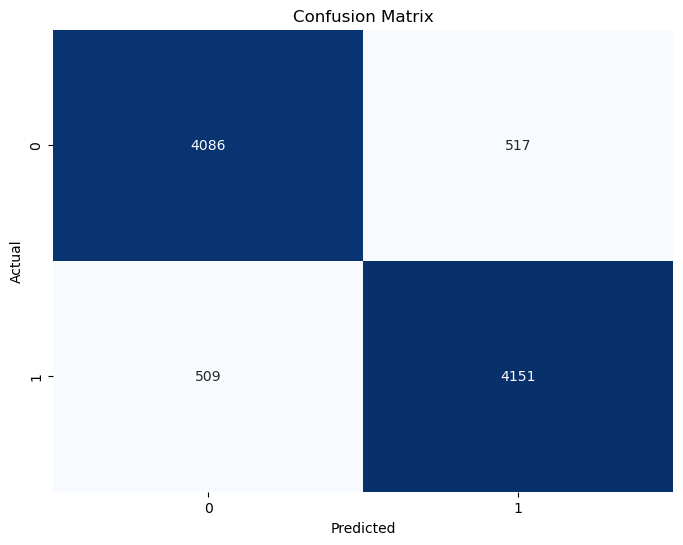

In [59]:
ABC = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ABC.fit(x_train, y_train)

pred_ABC = ABC.predict(x_test)

acy = accuracy_score(y_test, pred_ABC)
cfmt = confusion_matrix(y_test, pred_ABC)
clfr = classification_report(y_test, pred_ABC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## BaggingClassifier

In [61]:
param_combinations = [ {'n_estimators': 50, 'random_state': 42},
    {'n_estimators': 100, 'random_state': 42},
    {'n_estimators': 150, 'random_state': 42},
    {'n_estimators': 200, 'random_state': 42},
    {'n_estimators': 250, 'random_state': 42} ]

best_accuracy = 0
best_params = None

for params in param_combinations:
    bagging_clf = BaggingClassifier(**params)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 250, 'random_state': 42}
Test Accuracy: 0.9005721688437871


Accuracy: 0.9005721688437871
Confusion Matrix:
 [[4211  392]
 [ 529 4131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      4603
           1       0.91      0.89      0.90      4660

    accuracy                           0.90      9263
   macro avg       0.90      0.90      0.90      9263
weighted avg       0.90      0.90      0.90      9263



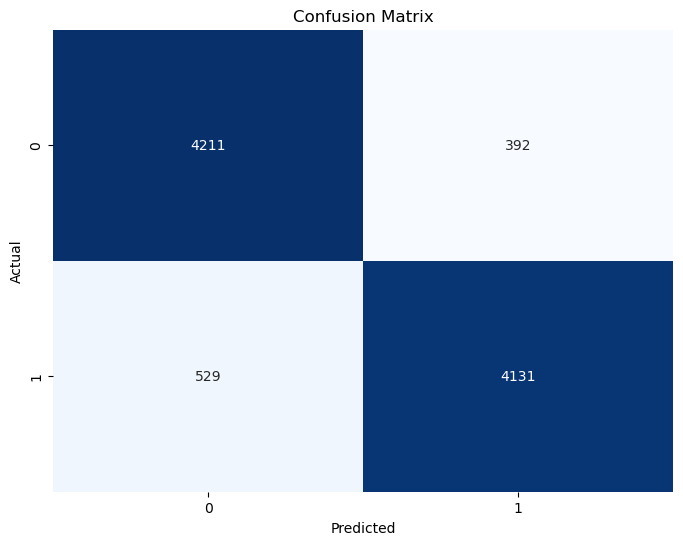

In [62]:
BC = BaggingClassifier(n_estimators=250, random_state=42)
BC.fit(x_train, y_train)

pred_BC = BC.predict(x_test)

acy = accuracy_score(y_test, pred_BC)
cfmt = confusion_matrix(y_test, pred_BC)
clfr = classification_report(y_test, pred_BC)

print("Accuracy:", acy)
print("Confusion Matrix:\n", cfmt)
print("Classification Report:\n", clfr)

plt.figure(figsize=(8, 6))
sns.heatmap(cfmt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## GradientBoostingClassifier work best

## Cross Validation Score

In [63]:
score = cross_val_score(GBC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, pred_GBC) - score.mean())

[0.70851776 0.88718558 0.94752753 0.95314187 0.95163032]
0.8896006110270814
0.021875152764346817


In [66]:
values = pd.DataFrame({'Actual': y_test, 'Predicted': pred_GBC})
values.sample(10)  # checking randomly Actual vs Predicted

,Actual,Predicted
44235,1,1
1473,0,0
24474,1,0
30048,1,1
11378,0,0
27547,1,1
31131,1,1
14094,0,0
30060,1,1
6044,1,1


##### Model gives almost correct prediction

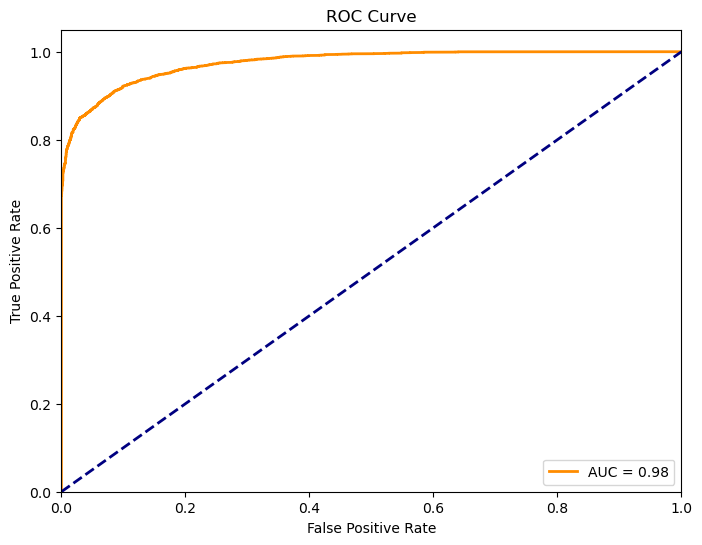

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

f, t, _ = roc_curve(y_test, GBC.predict_proba(x_test)[:, 1])
a = roc_auc_score(y_test, GBC.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(f, t, 'darkorange', lw=2, label=f'AUC = {a:.2f}')
plt.plot([0, 1], [0, 1], 'navy', lw=2, ls='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [71]:
import joblib
# Save the model as a objectfile

joblib.dump(GBC,'Census_Income')

['Census_Income']

In [72]:
model=joblib.load(open("Census_Income","rb"))
model

GradientBoostingClassifier(n_estimators=250)